In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")


In [2]:
df=pd.read_csv('/content/sample_data/card_transactions.csv')

In [3]:
df

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.60,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.30,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.00,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.00,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,zdVfd3CYHYBjf61b,1127.607606,0.00,271.093275,0.00,1.000000,0.00,0.000000,0.000000,0.000000,0.083333,1,0,8500.0,12,662.387331,260.277533,0.000000
8496,JGghMowcxhfbVGKm,21.409828,149.71,0.000000,0.00,1.000000,149.71,0.916667,0.000000,0.916667,0.000000,0,11,1500.0,12,141.974905,150.500248,0.166667
8497,5GrEtC6ncxuLpnXZ,0.000000,0.00,253.887233,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.111111,1,0,500.0,9,2437.932505,NaN,0.000000
8498,Ox7ETtYHjE2uo4Xo,1646.384530,1047.34,146.650389,1047.34,1.000000,0.00,0.583333,0.583333,0.000000,0.166667,2,51,3000.0,12,462.848132,497.408854,0.000000


In [4]:
# FUNCTION --> # Shows you a report with the main info of each column from data frame
def df_main_insights (data_frame):
    print('\nThis data frame have the following shape: ', data_frame.shape)
    for col_name in data_frame.columns:
        print('\nThe column:', '"', col_name, '"',
              'corresponds to index:', '"', data_frame.columns.get_loc(col_name), '"',
              'contains this amount of unique values inside:', '"', len(data_frame[col_name].unique()), '"',
              'contain this type of data:', data_frame[col_name].dtypes, '"'
             )

# How to call this function? --> df_main_insights (target_df)

In [5]:
df_main_insights(df)


This data frame have the following shape:  (8500, 18)

The column: " customer_id " corresponds to index: " 0 " contains this amount of unique values inside: " 8500 " contain this type of data: object "

The column: " balance_account " corresponds to index: " 1 " contains this amount of unique values inside: " 8425 " contain this type of data: float64 "

The column: " purchases_amount " corresponds to index: " 2 " contains this amount of unique values inside: " 5896 " contain this type of data: float64 "

The column: " paid_advance " corresponds to index: " 3 " contains this amount of unique values inside: " 4097 " contain this type of data: float64 "

The column: " full_purchases " corresponds to index: " 4 " contains this amount of unique values inside: " 3826 " contain this type of data: float64 "

The column: " balance_frequency_update " corresponds to index: " 5 " contains this amount of unique values inside: " 43 " contain this type of data: float64 "

The column: " installments 

In [6]:
# FUNCTION --> # Shows you all the column names of your data frame have
def df_col_names_listed (data_frame):
    for col_name in data_frame.columns:
        print(col_name)

# How to call this function? --> df_col_names_listed (target_df)

In [7]:
df_col_names_listed(df)

customer_id
balance_account
purchases_amount
paid_advance
full_purchases
balance_frequency_update
installments
purchases_frequency
full_purchases_frequency
purchases_installments_frequency
cash_advance_frequency
nr_cash_advances
nr_purchases
credit_limit
fixed_rate_period
payments
min_payments
full_payment_prc


In [8]:
# FUNCTION --> It Drops a range of columns from a targeted DataFrame:
def df_cols_drop (data_frame, i, j): # we will declare a range of columns
    print ("The Initial shape of your DataFrame was: ", data_frame.shape)
    data_frame = data_frame.drop(data_frame.iloc[:, i:j], axis=1) # dropping from index i to j-1; axis=1 denotes we are referring to columns and not to rows
    print ("The specified Column was dropped and now the shape of the DataFrame is: ", data_frame.shape)
    return data_frame # it saves the new df we have just generated

# How to call this function? --> df = df_cols_drop (target_df, start_Col_index, end_Col_index)

In [9]:
# FUNCTION --> # Identifies all unique values for all df columns
def df_identification_of_unique_values_per_column (data_frame):
    # variable to hold the count
    cnt = 0
    # list to hold visited values
    visited = []
    for col_name in data_frame.columns:
        # Listing all unique values that exist in the specified colum of the data frame
        print('\nColumn name:', col_name,'have these unique data elements:\n\n', '"', data_frame[col_name].unique(), '"')
        # loop for counting the unique values
        for i in range(0, len(data_frame[col_name])):

            if data_frame[col_name][i] not in visited:

                #visited.append(data_frame[col_name][i])

                cnt += 1

        print("No.of.unique values :", cnt)
        #print("unique values :", visited)

# How to call this function? --> df_identification_of_unique_values_per_column (target_df)

In [10]:
df_identification_of_unique_values_per_column(df)


Column name: customer_id have these unique data elements:

 " ['tGEg8fT2eCgVxdwS' 'stEDu20sSKOXomjg' 'CEB2blrN3b88GsRe' ...
 '5GrEtC6ncxuLpnXZ' 'Ox7ETtYHjE2uo4Xo' 'QIwf3M4Yn4EHwAyv'] "
No.of.unique values : 8500

Column name: balance_account have these unique data elements:

 " [   9.298409   52.666422 1360.795674 ...   21.409828 1646.38453
 1861.08737 ] "
No.of.unique values : 17000

Column name: purchases_amount have these unique data elements:

 " [ 107.6   150.3     0.   ...  149.71 1047.34 1752.06] "
No.of.unique values : 25500

Column name: paid_advance have these unique data elements:

 " [   0.        462.861443 1162.045833 ...  271.093275  253.887233
  146.650389] "
No.of.unique values : 34000

Column name: full_purchases have these unique data elements:

 " [   0.    363.18   95.   ... 1545.23 1047.34 1417.18] "
No.of.unique values : 42500

Column name: balance_frequency_update have these unique data elements:

 " [0.909091 1.       0.363636 0.818182 0.727273 0.636364 0.8333

In [11]:
# FUNCTION --> # Shows you (if applies) in which colums you already have NaN and/or Null values
def df_check_of_NaNs_and_Nulls (data_frame):
    print('\nYour dataframe NaN content is:\t\n\n', data_frame.isna().values.any(), '\n')
    print('\nYour dataframe Null content is:\t\n\n', data_frame.isnull().values.any(), '\n')

# How to call this function? --> df_check_of_NaNs_and_Nulls (target_df)

In [12]:
df_check_of_NaNs_and_Nulls (df)


Your dataframe NaN content is:	

 True 


Your dataframe Null content is:	

 True 



In [13]:
#df2 = df.replace(np.nan, '', regex=True)
df2=df.fillna(0)
df3=df2.drop(['customer_id'], axis=1)

In [14]:
df3.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [15]:
from sklearn.cluster import KMeans

ss = []
cluster_ranges = range(2, 5)

for K in cluster_ranges:
    # fit a k-means model
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=1000, max_iter=10000)
    kmeans.fit_predict(df3)
    # stores the ss errors.
    ss.append(kmeans.inertia_)

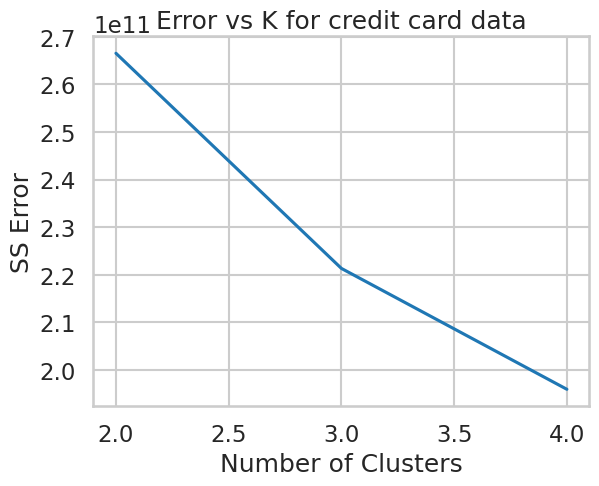

In [16]:
ax = sns.lineplot(x=cluster_ranges, y=ss)
ax.set_title("Error vs K for credit card data")
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('SS Error');


In [17]:
cluster_errors = []

for n_clusters in range(2, 5):
    kmeans_pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters, random_state=42, verbose=0))])
    kmeans_pipeline.fit(df3)
    #kmeans_pipeline.predict(df)
    wcsse = kmeans_pipeline.named_steps["cluster"].inertia_
    print('K = ', n_clusters, '\tWCSS Err. = ', wcsse)
    cluster_errors.append(wcsse)

K =  2 	WCSS Err. =  121471.81573968181
K =  3 	WCSS Err. =  106428.41002665908
K =  4 	WCSS Err. =  94094.83653669705


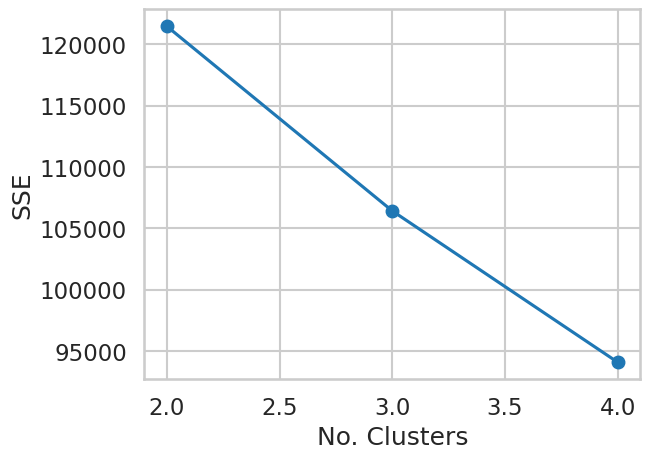

In [18]:
plt.plot(range(2, 5), cluster_errors, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("SSE")
plt.show()

In [19]:
df3.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


For n_clusters = 3 The average silhouette_score is : 0.52
For n_clusters = 4 The average silhouette_score is : 0.5228




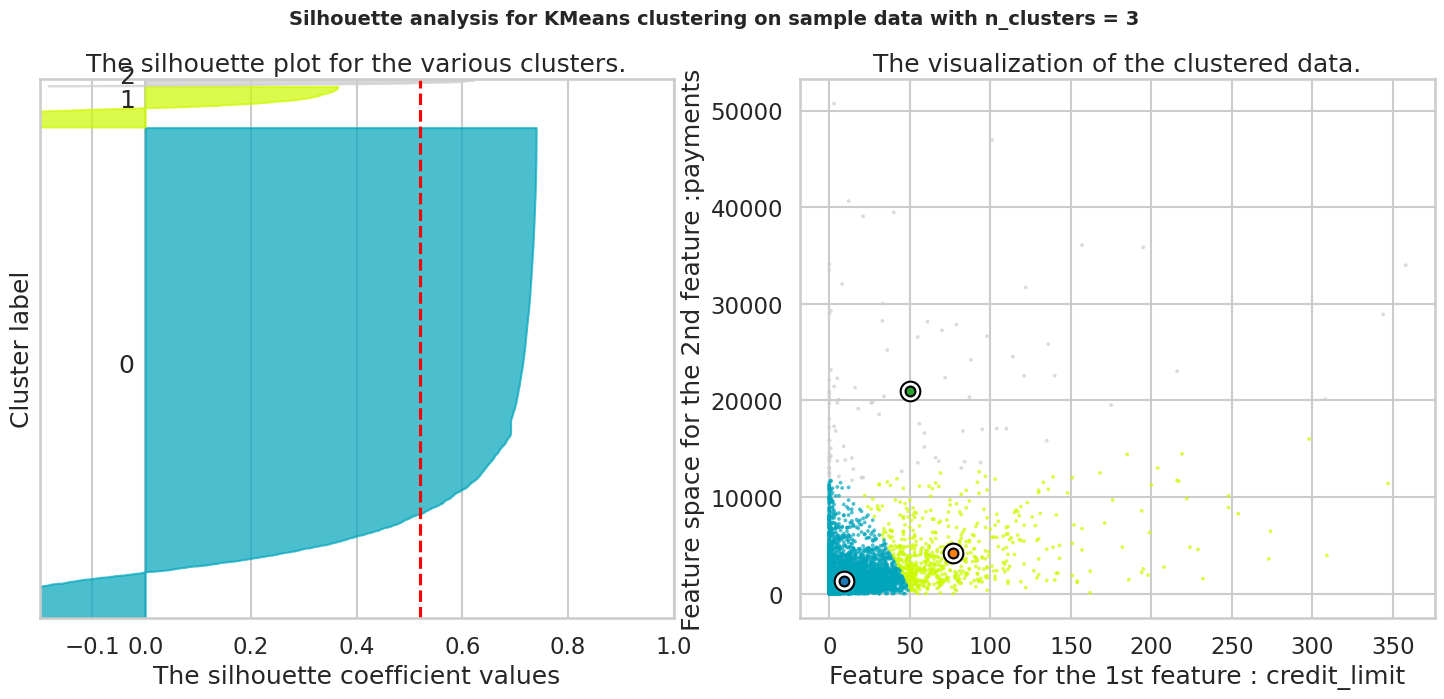

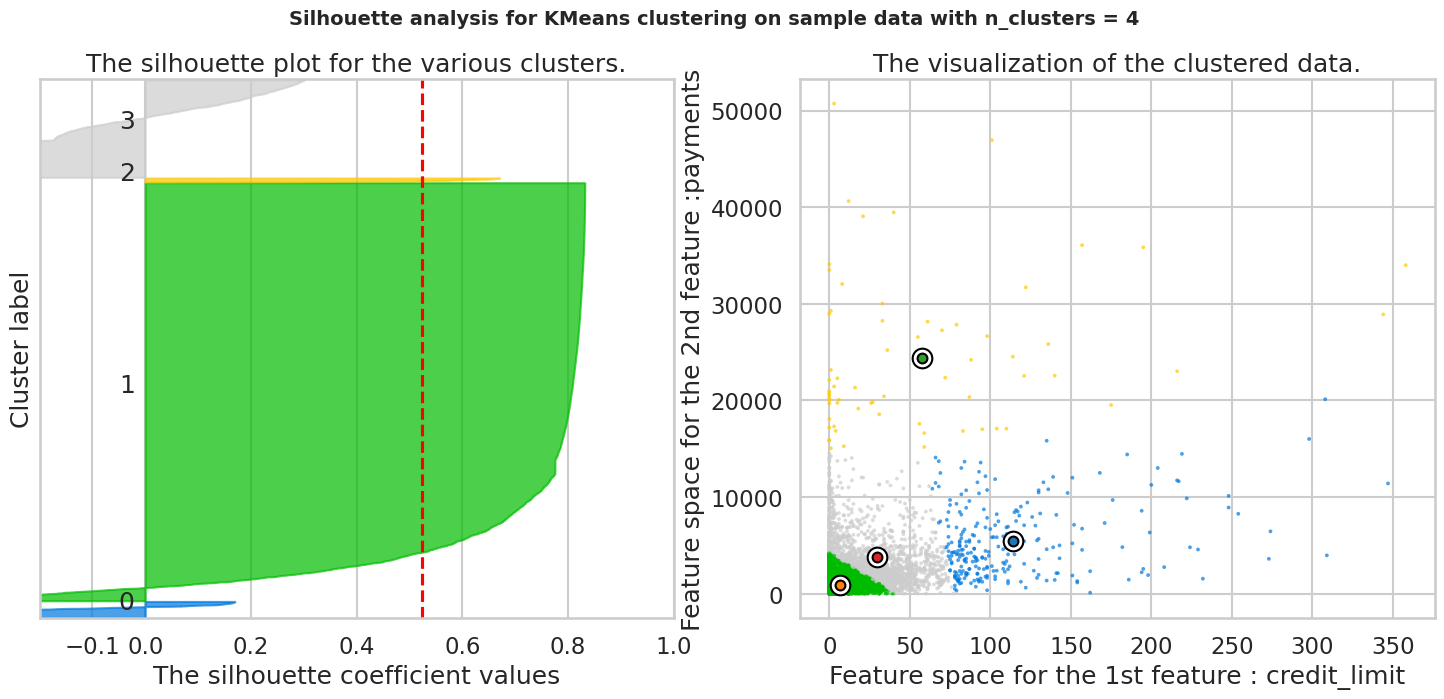

In [20]:
''' Note: The code below is directly took from sklearn documentation of silhoutte analysis.
          And so you do not have to spend time trying to understand the code'''


X = df3[['nr_purchases', 'payments']].values
range_n_clusters = range(3, 5)

r_seed = 17

cols = df3.columns

for n_clusters in range_n_clusters:

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.2, 1]
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the Pipeline with n_clusters value and a random generator seed for reproducibility.
    kmeans_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("cluster", KMeans(n_clusters=n_clusters, random_state=r_seed, verbose=0))])

    cluster_labels = kmeans_pipeline.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =",
          n_clusters,
          "The average silhouette_score is :",
          silhouette_avg.round(4))

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i + 1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float) + 1) / n_clusters)
    ax2.scatter(X[:, 0],
                X[:, 1],
                marker=".",
                s=30,
                lw=0,
                alpha=0.7,
                c=colors,
                edgecolor="k")

    # Labeling the clusters
    pipeline_centers = kmeans_pipeline.named_steps["cluster"].cluster_centers_
    centers = kmeans_pipeline.named_steps["scaler"].inverse_transform(pipeline_centers)
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature : " + cols[12])
    ax2.set_ylabel("Feature space for the 2nd feature :" + cols[14])

    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )
print("\n")
plt.show()

In [21]:
ss=StandardScaler()
X_scaled = ss.fit_transform(df3)

In [22]:
from sklearn.decomposition import PCA

# First calculate top two PCA features.
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X_scaled)
x = pca_features[:,0]
y = pca_features[:,1]

K=4

kmeans = KMeans(n_clusters=K, random_state=42, n_init=1000, max_iter=10000)
cl_labels = kmeans.fit_predict(X_scaled)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels,
                                'pc_1':x,
                                'pc_2':y})
df_pca_features

,cluster_id,pc_1,pc_2
0,2,-0.288717,-2.003881
1,2,-0.689063,-1.701090
2,1,-1.969655,0.541056
3,2,0.489158,-0.847176
4,1,-1.642822,-0.012529
...,...,...,...
8495,1,-1.366723,0.215955
8496,2,-0.149383,-1.790614
8497,1,-2.437911,-0.879093
8498,2,0.536027,-0.146945


In [23]:
customer_segments = pd.DataFrame({
    #'customer_name': pivot.index.tolist(),
    'Cluster': cl_labels
})

customer_segments.head(10)

,Cluster
0,2
1,2
2,1
3,2
4,1
5,3
6,1
7,1
8,1
9,1


In [ ]:
customer_segments.to_csv('./customer_segments.csv')

In [ ]:
#df_cluster_merged.head(10)

df_cluster_merged=pd.merge(df3, customer_segments, left_index=True, right_index=True)
df_cluster_merged.head()


,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,0
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,0
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,0
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,0
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,0


In [ ]:
df_cluster_merged.to_csv('./full_df.csv')

In [ ]:
cluster1=df_cluster_merged[df_cluster_merged.Cluster==0]
cluster2=df_cluster_merged[df_cluster_merged.Cluster==1]
cluster3=df_cluster_merged[df_cluster_merged.Cluster==2]
cluster4=df_cluster_merged[df_cluster_merged.Cluster==3]

#np.sum(df_cluster_merged.purchases_amount[Cluster==1])

In [ ]:
means=df_cluster_merged.groupby('Cluster').mean().T
means.head()

Cluster,0,1,2,3
balance_account,819.473713,4117.752794,2058.188669,4823.669486
purchases_amount,510.598677,2101.207578,1268.152352,10213.339101
paid_advance,491.192606,2185.232257,1296.393522,7199.232515
full_purchases,250.153278,1329.572664,766.998551,7347.849551
balance_frequency_update,0.852522,0.930118,0.905899,0.849939


In [ ]:
len(cluster1),len(cluster2),len(cluster3),len(cluster4)

(5018, 867, 2526, 89)

In [ ]:
cluster1.head()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster
0,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,0
1,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,0
2,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,0
3,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,0
4,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,0


In [ ]:
prof1=np.sum(cluster1.purchases_amount)

In [ ]:
prof2=np.sum(cluster2.purchases_amount)

In [ ]:
prof3=np.sum(cluster3.purchases_amount)

In [ ]:
prof4=np.sum(cluster4.purchases_amount)

In [ ]:
profits=[prof1,prof2,prof3,prof4]

In [ ]:
profits

[2562184.16, 1821746.97, 3203352.84, 908987.18]

In [ ]:
np.max(profits)

3203352.84

In [ ]:
np.min(profits)

908987.18

In [ ]:
cluster1.describe()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster
count,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.000000,5018.0
mean,819.473713,510.598677,491.192606,250.153278,0.852522,260.754687,0.448802,0.129791,0.345282,0.111555,2.350937,9.512555,2110.167508,11.356317,870.418536,620.783698,0.141241,0.0
std,843.742935,744.198986,878.135852,550.880084,0.256018,448.246074,0.393600,0.228673,0.390306,0.168750,4.801854,13.463478,996.051110,1.534073,944.804284,1788.748782,0.278664,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.0
25%,72.927721,0.000000,0.000000,0.000000,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,12.000000,280.829479,142.387299,0.000000,0.0
50%,579.019698,245.850000,0.000000,0.000000,1.000000,62.875000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2000.000000,12.000000,543.120507,227.573862,0.000000,0.0
75%,1299.422734,665.770000,672.804390,240.237500,1.000000,354.840000,0.875000,0.166667,0.750000,0.166667,3.000000,12.000000,3000.000000,12.000000,1106.323230,518.618369,0.111111,0.0
max,4414.952906,8591.310000,6718.127621,8053.950000,1.000000,5463.730000,1.000000,1.000000,1.000000,1.166667,123.000000,186.000000,4500.000000,12.000000,9282.027007,38512.124770,1.000000,0.0


In [ ]:
cluster2.describe()


,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster
count,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.0
mean,4117.752794,2101.207578,2185.232257,1329.572664,0.930118,771.712134,0.583590,0.359416,0.420408,0.195258,5.159170,27.475202,12020.593478,11.750865,3489.473034,1449.587783,0.162265,1.0
std,3674.983701,2765.082444,3163.188716,2006.167948,0.177863,1521.825497,0.404553,0.367914,0.410572,0.254100,9.190066,39.483329,2819.202159,0.960049,2973.641387,2230.590706,0.315761,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7500.000000,6.000000,0.000000,0.000000,0.000000,1.0
25%,497.785290,199.345000,0.000000,0.000000,1.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,10000.000000,12.000000,1366.107355,211.895124,0.000000,1.0
50%,3478.070041,996.640000,328.698275,497.080000,1.000000,220.740000,0.666667,0.250000,0.333333,0.083333,1.000000,12.000000,11500.000000,12.000000,2326.997535,957.077692,0.000000,1.0
75%,6754.491405,2956.175000,3611.408621,1784.645000,1.000000,1008.205000,1.000000,0.666667,0.833333,0.333333,7.000000,36.000000,13475.000000,12.000000,4832.266974,1913.685546,0.095454,1.0
max,18495.558550,22500.000000,16323.642430,12650.000000,1.000000,22500.000000,1.000000,1.000000,1.000000,1.125000,110.000000,347.000000,30000.000000,12.000000,12493.778940,43132.728230,1.000000,1.0


In [ ]:
cluster3.describe()

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,Cluster
count,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.000000,2526.0
mean,2058.188669,1268.152352,1296.393522,766.998551,0.905899,501.555887,0.533700,0.282612,0.376646,0.156564,4.070071,18.846793,6312.689244,11.743468,2104.207350,989.877559,0.165713,2.0
std,2037.753393,1680.726517,2046.458485,1287.789267,0.207915,842.747074,0.402722,0.338663,0.401810,0.222772,7.886185,27.684887,1447.093084,0.940985,2108.615960,3112.269760,0.302997,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1200.000000,6.000000,0.000000,0.000000,0.000000,2.0
25%,228.465826,93.240000,0.000000,0.000000,0.909091,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,5000.000000,12.000000,737.720422,177.259509,0.000000,2.0
50%,1486.833568,650.565000,0.000000,234.245000,1.000000,125.465000,0.583333,0.166667,0.211111,0.000000,0.000000,10.000000,6000.000000,12.000000,1347.191929,415.344159,0.000000,2.0
75%,3472.188640,1793.892500,2161.524102,1000.000000,1.000000,666.630000,1.000000,0.500000,0.750000,0.250000,5.000000,25.000000,7500.000000,12.000000,2705.867907,1069.322425,0.166667,2.0
max,10571.411070,13013.500000,14127.466640,12462.440000,1.000000,7787.980000,1.000000,1.000000,1.000000,1.500000,123.000000,309.000000,9500.000000,12.000000,14229.882480,76406.207520,1.000000,2.0


In [ ]:
ss=StandardScaler()
X = ss.fit_transform(df3)

#X=df3


In [ ]:
from sklearn.decomposition import PCA

# First calculate top two PCA features.
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
x = pca_features[:,0]
y = pca_features[:,1]

K=4

kmeans = KMeans(n_clusters=K, random_state=42, n_init=1000, max_iter=10000)
cl_labels = kmeans.fit_predict(X)
df_pca_features = pd.DataFrame({'cluster_id': cl_labels,
                                'pc_1':x,
                                'pc_2':y})
df_pca_features

,cluster_id,pc_1,pc_2
0,2,-0.288719,-2.003878
1,2,-0.689052,-1.701104
2,1,-1.969652,0.541051
3,2,0.489131,-0.847137
4,1,-1.642822,-0.012529
...,...,...,...
8495,1,-1.366700,0.215923
8496,2,-0.149379,-1.790619
8497,1,-2.437920,-0.879081
8498,2,0.536032,-0.146952


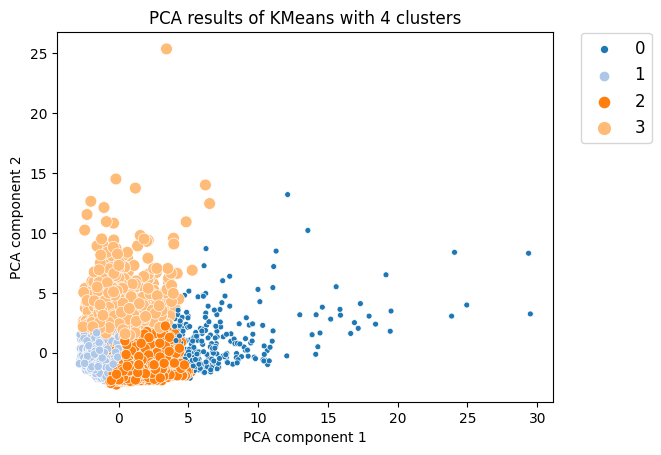

In [ ]:
ax = sns.scatterplot(x='pc_1', y='pc_2',
                hue='cluster_id',
                size='cluster_id',
                data=df_pca_features,
                palette='tab20',
                legend='full')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')
ax.set_title('PCA results of KMeans with ' + str(K) + ' clusters')
ax.legend(bbox_to_anchor=(1.04,1.02), loc='upper left', fontsize='large');
#plt.savefig('pca.png')

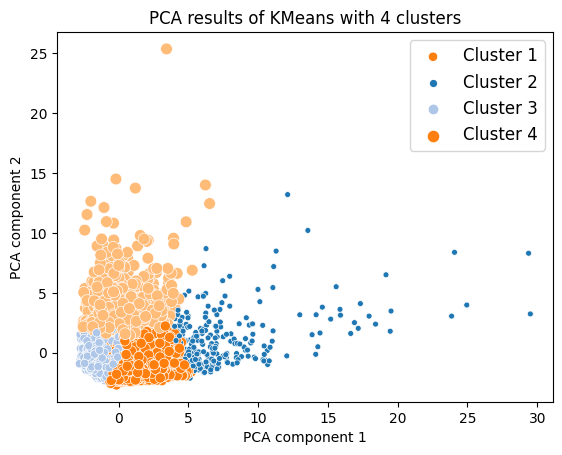

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assign custom legend labels for each cluster
legend_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

ax = sns.scatterplot(x='pc_1', y='pc_2',
                     hue='cluster_id',
                     size='cluster_id',
                     data=df_pca_features,
                     palette='tab20')

# Remove the default legend title
ax.get_legend().set_title(None)

# Update legend labels
ax.legend(labels=legend_labels, loc='upper right', fontsize='large')

# Set axis labels and title
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2')
ax.set_title('PCA results of KMeans with ' + str(K) + ' clusters')

# Save the figure
plt.savefig('pca.svg', bbox_inches='tight')

In [ ]:

# Retrieve the feature names from the DataFrame
feature_names = df3.columns.tolist()

# Iterate over the feature names
#for feature in feature_names:
#    print(feature)

# Create a PCA object with the desired number of components
n_components = 3  # Number of components you want to retain
pca = PCA(n_components=n_components)

# Fit the PCA model to your data
pca.fit(X)  # X is your data matrix

# Recover the coefficients (loadings)
coefficients = pca.components_
#feature_names=['']
# Print the coefficients or do further analysis
for i in range(n_components):
    print(f"Principal Component {i+1} coefficients:")
    for j, feature in enumerate(feature_names):
        print(f"{feature}: {coefficients[i, j]}")
    print()

Principal Component 1 coefficients:
balance_account: 0.10558509873728865
purchases_amount: 0.41180836708277546
paid_advance: -0.02039950914810084
full_purchases: 0.3470463708733736
balance_frequency_update: 0.12150497884285072
installments: 0.33818590002419247
purchases_frequency: 0.3191005129028273
full_purchases_frequency: 0.29328212985309404
purchases_installments_frequency: 0.2734061937828913
cash_advance_frequency: -0.0856662109365441
nr_cash_advances: -0.045605479686718346
nr_purchases: 0.3899186082117513
credit_limit: 0.21294105547370962
fixed_rate_period: 0.08012146006688081
payments: 0.2689778995155778
min_payments: 0.06538030139414175
full_payment_prc: 0.1297788939719318

Principal Component 2 coefficients:
balance_account: 0.40291929783702135
purchases_amount: 0.037156810910154596
paid_advance: 0.43868259305669327
full_purchases: 0.05959664207281023
balance_frequency_update: 0.1307420538057633
installments: -0.021465469899493616
purchases_frequency: -0.19349086683723885
full

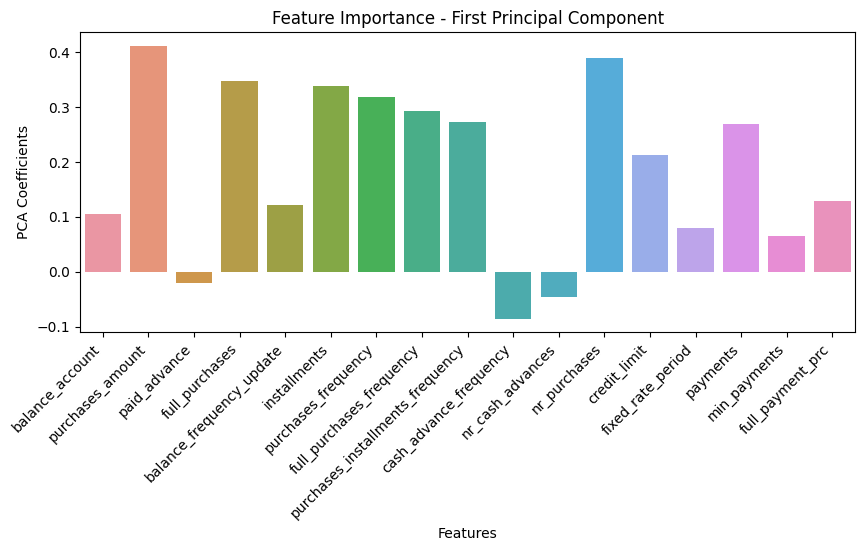

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Retrieve the feature names and PCA coefficients
#feature_names = df_cluster_merged.columns.tolist()
coefficients = pca.components_

# Create a bar plot or heatmap of the coefficients
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Bar plot
sns.barplot(x=feature_names, y=coefficients[0])  # Plot the coefficients for the first principal component
#ax.set_xticklabels(categories, rotation=45, ha='right')
plt.xticks(rotation=45,ha='right')  # Rotate the x-axis labels if needed
plt.xlabel('Features')
plt.ylabel('PCA Coefficients')
plt.title('Feature Importance - First Principal Component')

# Heatmap
#sns.heatmap(coefficients, annot=True, xticklabels=feature_names, yticklabels=['PC1', 'PC2'])  # Plot all the coefficients as a heatmap
#plt.xlabel('Features')
#plt.ylabel('Principal Components')
#plt.title('Feature Importance - PCA Coefficients Heatmap')
# Adjust the bottom margin
plt.subplots_adjust(bottom=0.38)  # Adjust the margin value as needed

plt.savefig('pca_coeffs1.svg')
plt.show()

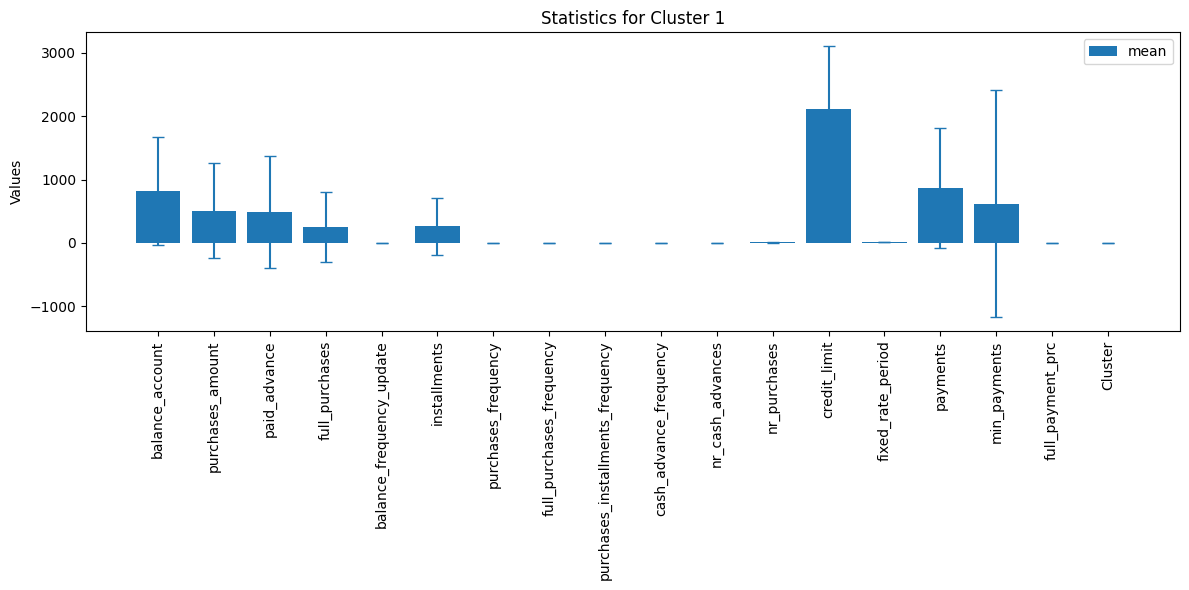

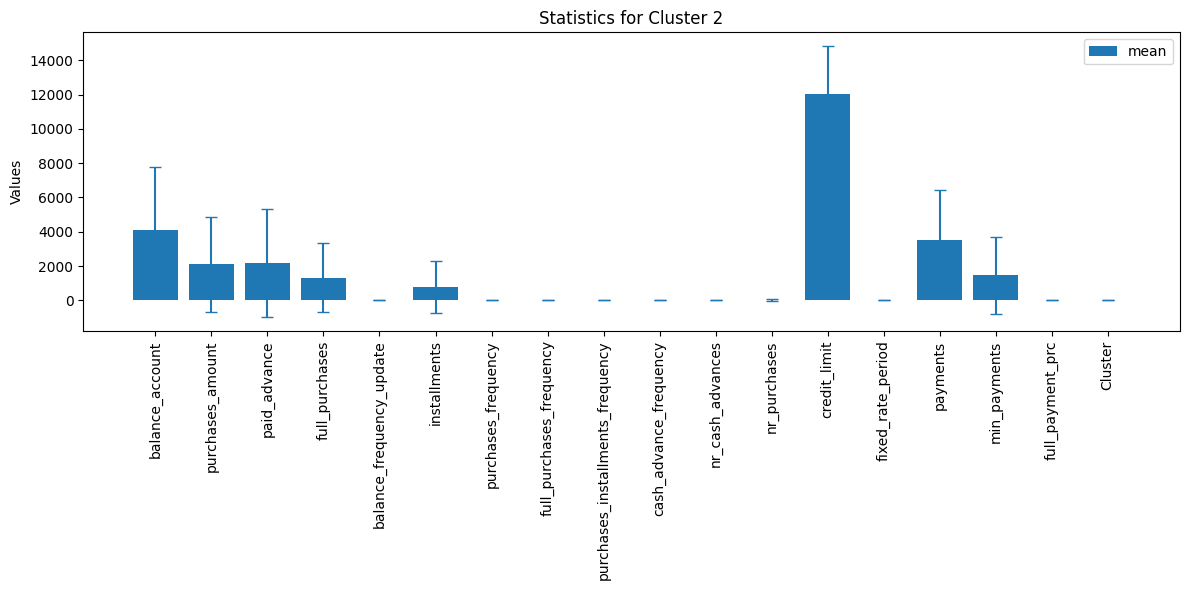

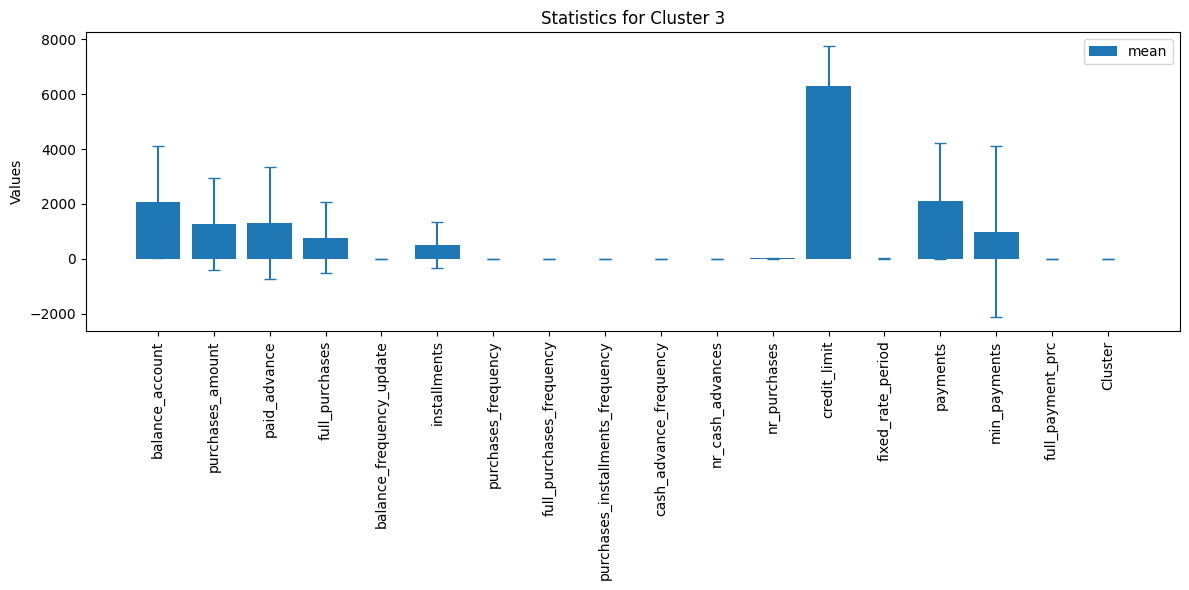

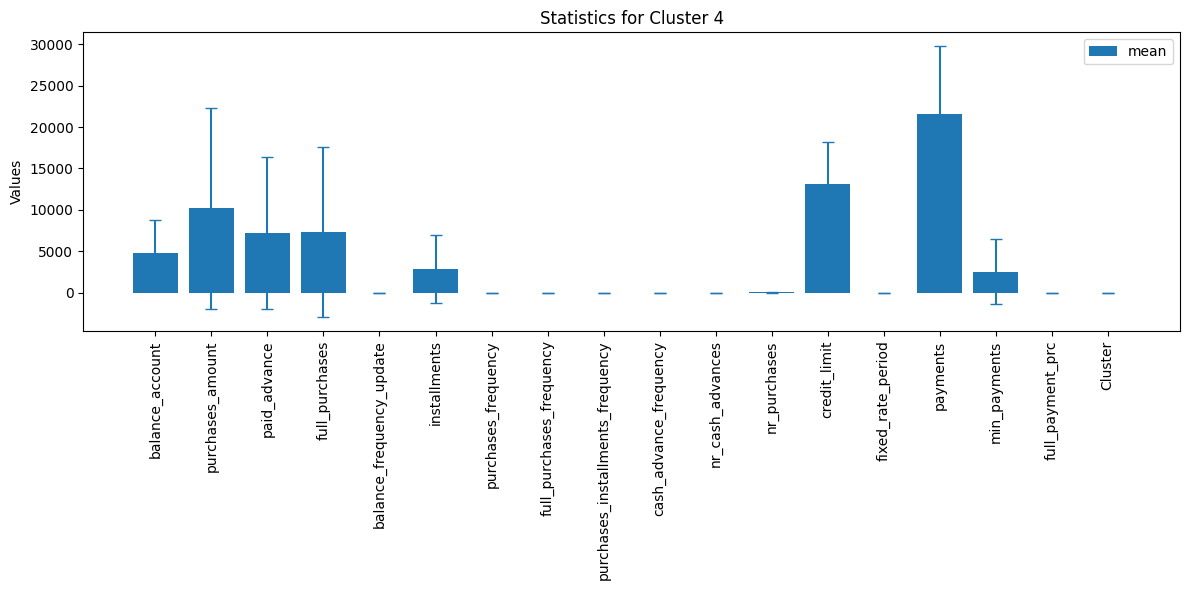

In [ ]:
# List of cluster dataframes
clusters = [cluster1, cluster2, cluster3, cluster4]

# Iterate over clusters
for i, cluster in enumerate(clusters):
    # Transpose the DataFrame to have features as columns
    cluster_stats = cluster.describe().T

    # Plotting the statistics for each feature
    fig, ax = plt.subplots(figsize=(12, 6))

    # Set the x-axis labels to be the feature names
    x_labels = cluster_stats.index

    # Plot the statistics using bar plots
    ax.bar(x_labels, cluster_stats['mean'], label='mean')
    ax.errorbar(x_labels, cluster_stats['mean'], yerr=cluster_stats['std'], fmt='none', capsize=4)

    # Add other statistics if desired (e.g., min, max)
    # ax.bar(x_labels, cluster_stats['min'], label='min')
    # ax.bar(x_labels, cluster_stats['max'], label='max')

    ax.set_xticklabels(x_labels, rotation=90)  # Rotate the x-axis labels for better readability
    ax.set_ylabel('Values')
    ax.set_title(f'Statistics for Cluster {i+1}')
    ax.legend()

    plt.tight_layout()
    plt.show()

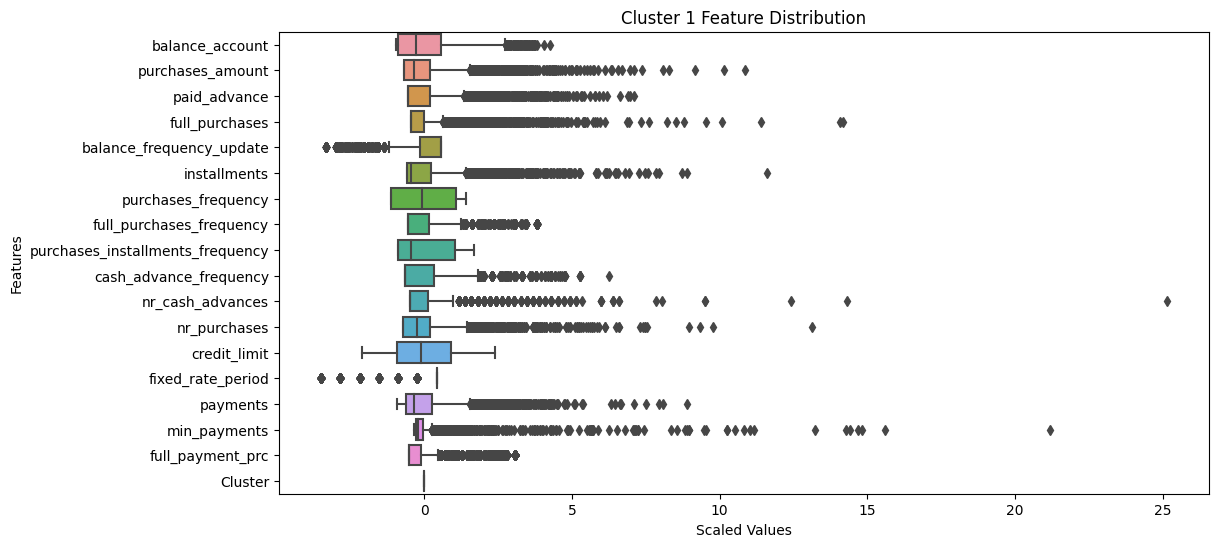

<Figure size 640x480 with 0 Axes>

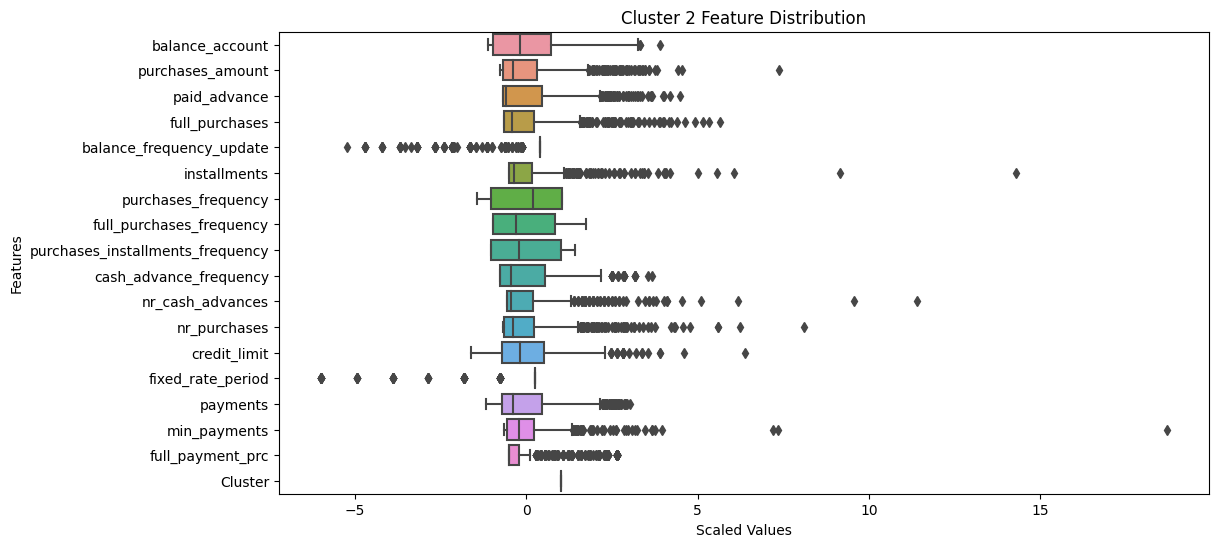

<Figure size 640x480 with 0 Axes>

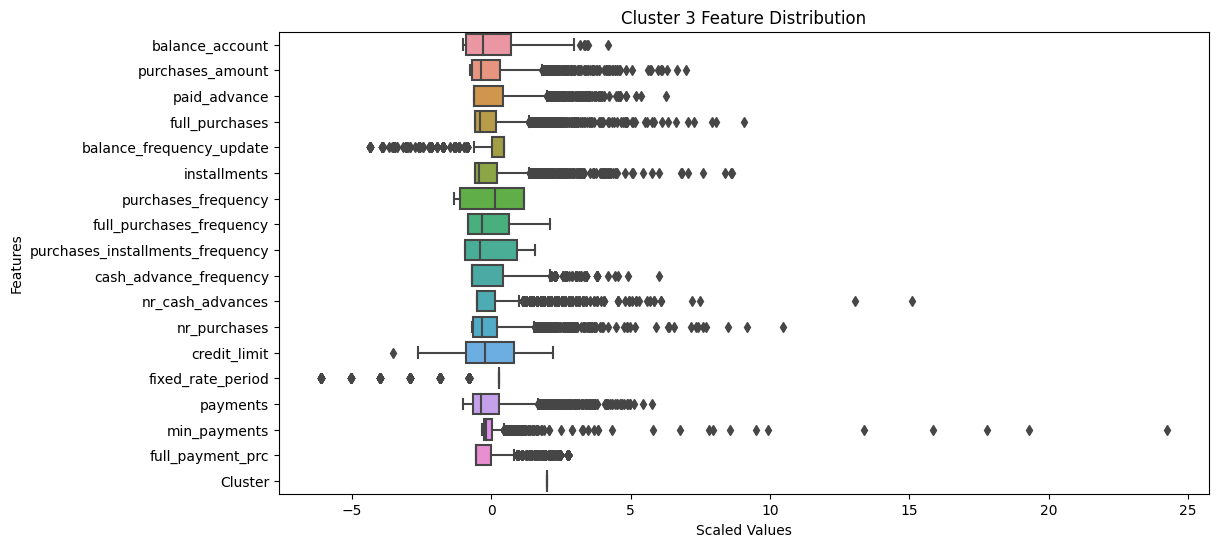

<Figure size 640x480 with 0 Axes>

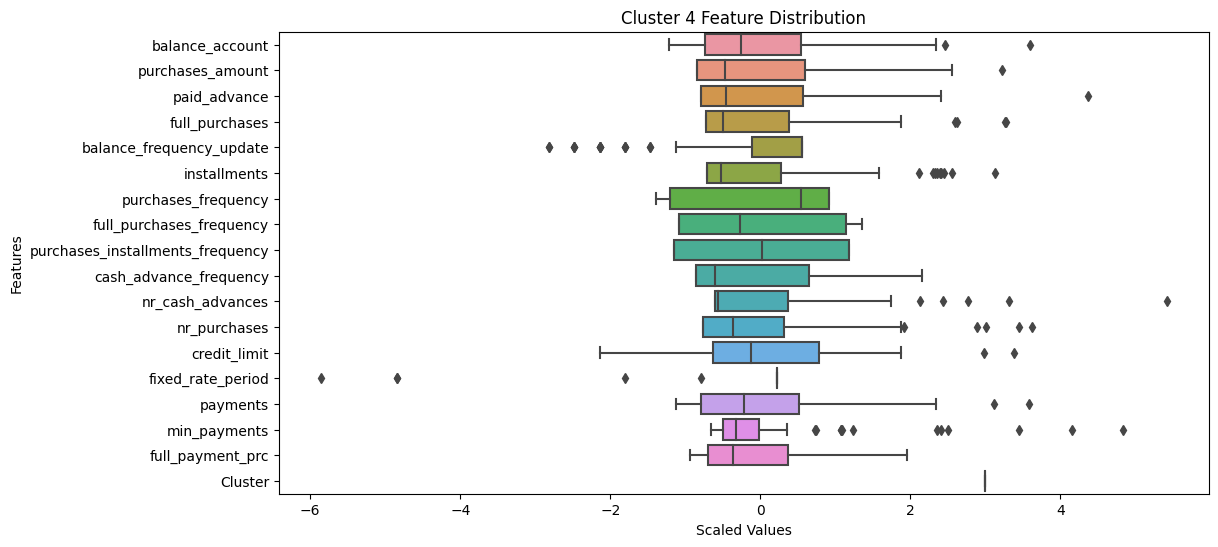

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Iterate over each cluster data frame
for cluster_number, cluster_df in enumerate([cluster1, cluster2, cluster3, cluster4]):
    # Extract the feature columns from the data frame
    features = cluster_df.columns[:-1]  # Exclude the 'Cluster' column

    # Scale the features using StandardScaler
    scaled_features = scaler.fit_transform(cluster_df[features])

    # Create a new data frame with the scaled features
    scaled_cluster_df = pd.DataFrame(scaled_features, columns=features)
    scaled_cluster_df['Cluster'] = cluster_df['Cluster']  # Add the 'Cluster' column back

    # Plot the box plots for each feature
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=scaled_cluster_df, orient='h')
    plt.title('Cluster ' + str(cluster_number +1) + ' Feature Distribution')
    plt.xlabel('Scaled Values')
    plt.ylabel('Features')
    plt.show()
    fname='dist'+ str(cluster_number + 1) +'.png'
    plt.gcf().savefig(fname, format='png')



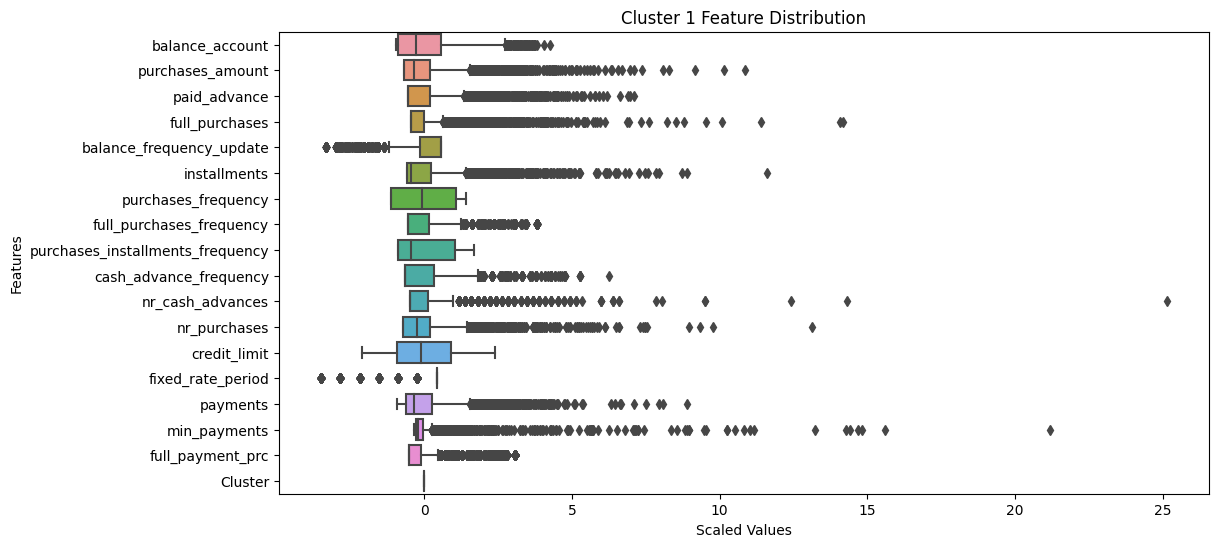

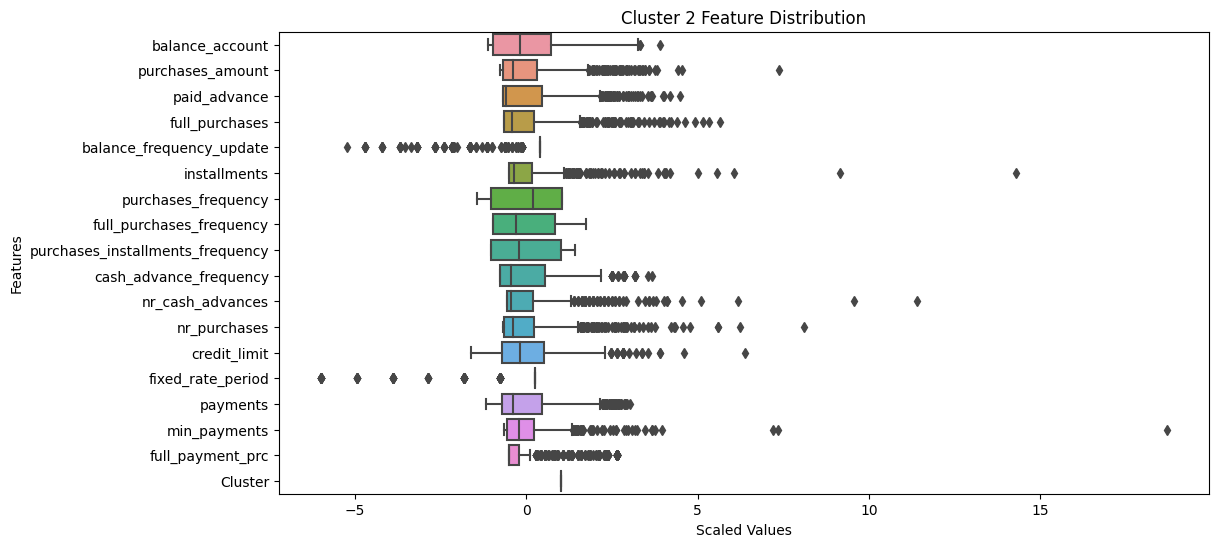

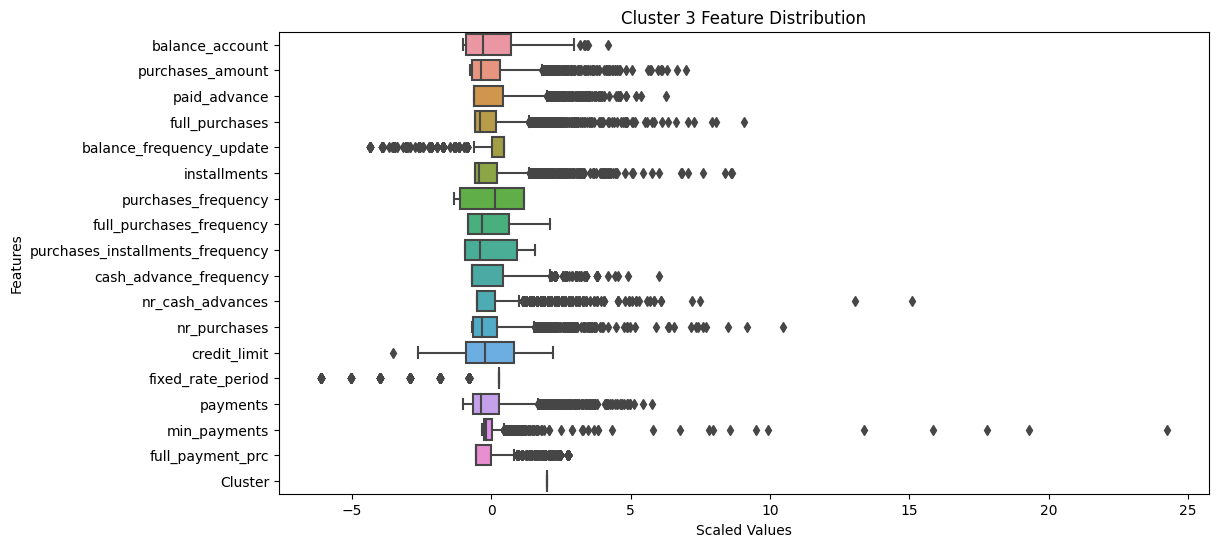

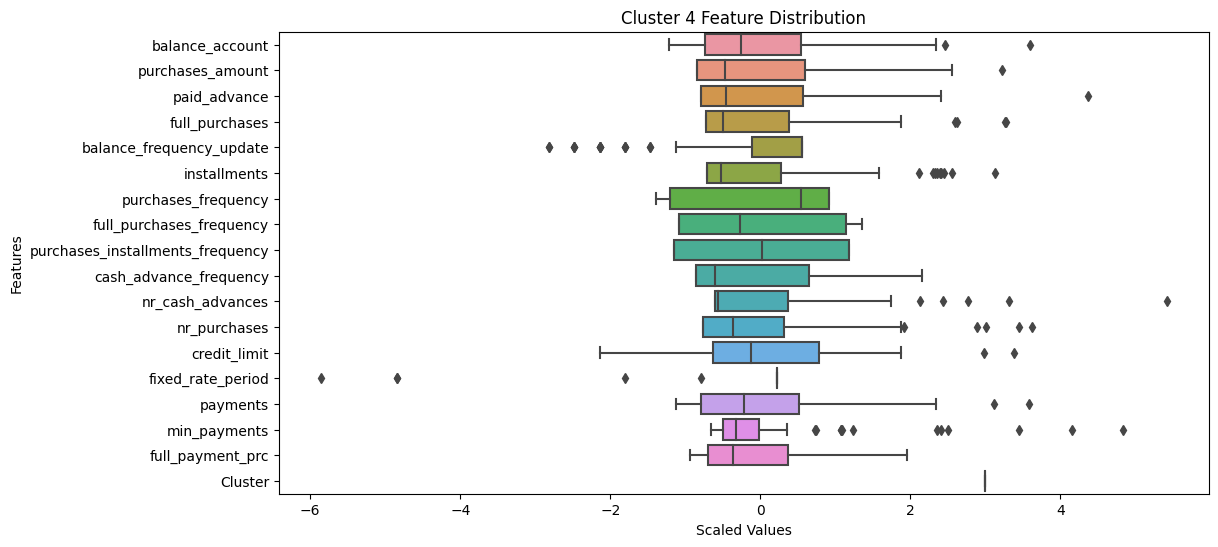

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Iterate over each cluster data frame
for cluster_number, cluster_df in enumerate([cluster1, cluster2, cluster3, cluster4]):
    # Extract the feature columns from the data frame
    features = cluster_df.columns[:-1]  # Exclude the 'Cluster' column

    # Scale the features using StandardScaler
    scaled_features = scaler.fit_transform(cluster_df[features])

    # Create a new data frame with the scaled features
    scaled_cluster_df = pd.DataFrame(scaled_features, columns=features)
    scaled_cluster_df['Cluster'] = cluster_df['Cluster']  # Add the 'Cluster' column back

    # Create a new figure explicitly
    fig = plt.figure(figsize=(12, 6))

    # Create axes for the box plot
    ax = fig.add_subplot(111)

    # Plot the box plot
    sns.boxplot(data=scaled_cluster_df, orient='h', ax=ax)

    # Set the title and labels
    ax.set_title('Cluster ' + str(cluster_number + 1) + ' Feature Distribution')
    ax.set_xlabel('Scaled Values')
    ax.set_ylabel('Features')

    # Save the figure
    fname = 'dist' + str(cluster_number + 1) + '.png'
    fig.savefig(fname, format='png')

    # Show the plot
    plt.show()

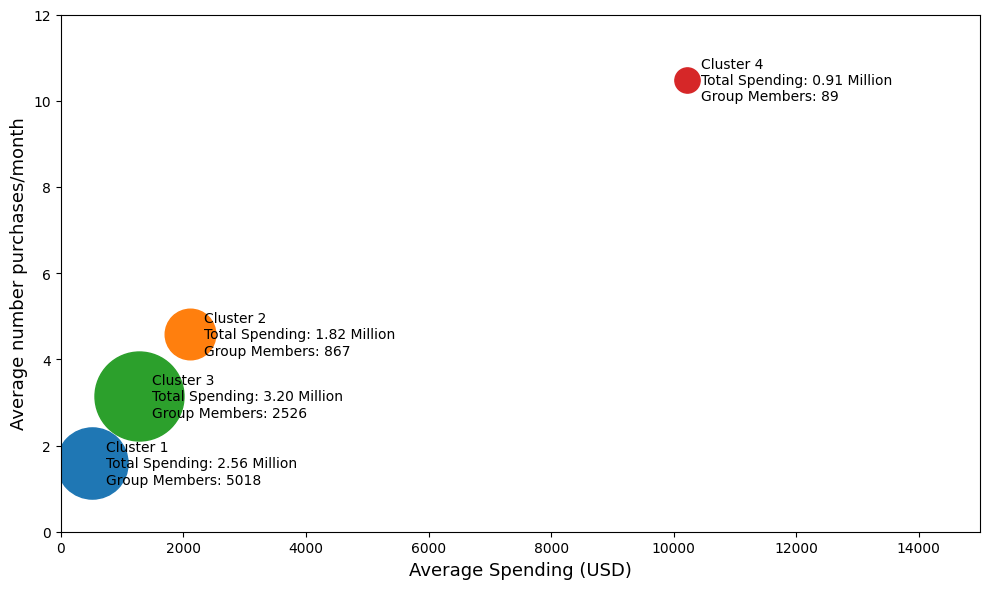

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the metrics for each cluster
average_spending = [cluster1['purchases_amount'].mean(), cluster2['purchases_amount'].mean(), cluster3['purchases_amount'].mean(), cluster4['purchases_amount'].mean()]
total_spending = [cluster1['purchases_amount'].sum(), cluster2['purchases_amount'].sum(), cluster3['purchases_amount'].sum(), cluster4['purchases_amount'].sum()]
average_frequency = [cluster1['purchases_frequency'].mean(), cluster2['purchases_frequency'].mean(), cluster3['purchases_frequency'].mean(), cluster4['purchases_frequency'].mean()]
number_purchases = [cluster1['nr_purchases'].mean(), cluster2['nr_purchases'].mean(), cluster3['nr_purchases'].mean(), cluster4['nr_purchases'].mean()]

cluster_sizes = [len(cluster1), len(cluster2), len(cluster3), len(cluster4)]
cluster_labels = ['Cluster 1\nTotal Spending: {:.2f} Million\nGroup Members: {}'.format(total_spending[0] / 1e6, cluster_sizes[0]),
                  'Cluster 2\nTotal Spending: {:.2f} Million\nGroup Members: {}'.format(total_spending[1] / 1e6, cluster_sizes[1]),
                  'Cluster 3\nTotal Spending: {:.2f} Million\nGroup Members: {}'.format(total_spending[2] / 1e6, cluster_sizes[2]),
                  'Cluster 4\nTotal Spending: {:.2f} Million\nGroup Members: {}'.format(total_spending[3] / 1e6, cluster_sizes[3])]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a line for each cluster with the actual color
for i in range(len(cluster_labels)):
    ax.plot(average_spending[i], number_purchases[i] / 6.0, marker='o', linestyle='-', label=cluster_labels[i], markersize=total_spending[i]*.00002)
    ax.annotate(cluster_labels[i], xy=(average_spending[i], number_purchases[i] / 6.0), xytext=(10, 0),
                textcoords='offset points', ha='left', va='center')
ax.set_xlim([0,15000])
ax.set_ylim([0,12])
# Set the x-axis labels and title
ax.set_xlabel('Average Spending (USD)', fontsize=12)
ax.set_ylabel('Average number purchases/month', fontsize=12)

# Increase the visibility of axis labels
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Increase the font size of axis labels
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)

# Display the plot
plt.tight_layout()
plt.savefig('incomes.svg')

In [ ]:
cluster_sizes


[1000, 867, 2526, 89]

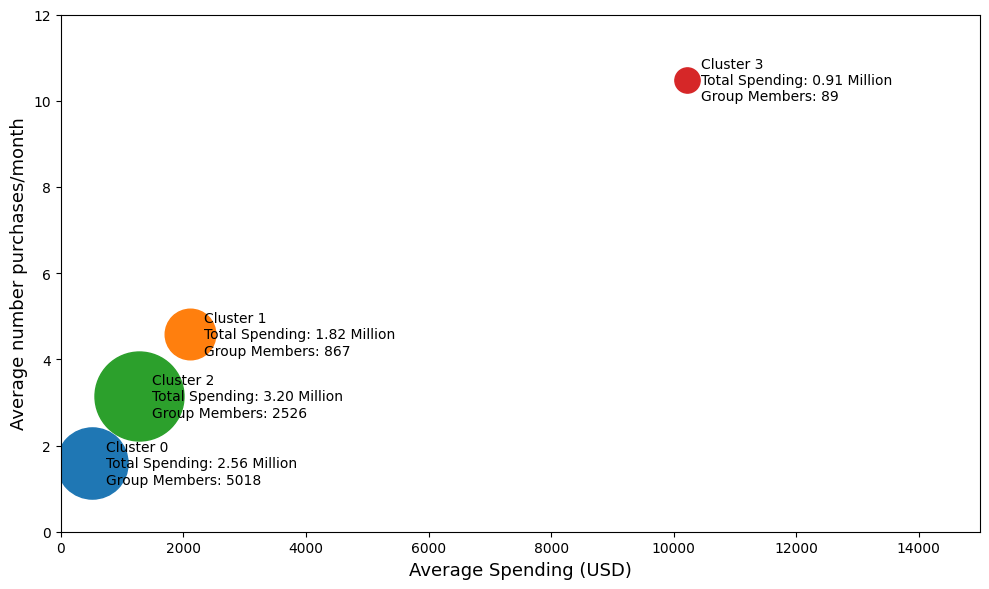

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the metrics for each cluster
average_spending = [cluster1['purchases_amount'].mean(), cluster2['purchases_amount'].mean(), cluster3['purchases_amount'].mean(), cluster4['purchases_amount'].mean()]
total_spending = [cluster1['purchases_amount'].sum(), cluster2['purchases_amount'].sum(), cluster3['purchases_amount'].sum(), cluster4['purchases_amount'].sum()]
average_frequency = [cluster1['purchases_frequency'].mean(), cluster2['purchases_frequency'].mean(), cluster3['purchases_frequency'].mean(), cluster4['purchases_frequency'].mean()]
number_purchases = [cluster1['nr_purchases'].mean(), cluster2['nr_purchases'].mean(), cluster3['nr_purchases'].mean(), cluster4['nr_purchases'].mean()]

cluster_sizes = [len(cluster1), len(cluster2), len(cluster3), len(cluster4)]
cluster_labels = ['Cluster 0\nTotal Spending: {:.2f} Million\nGroup Members: {}'.format(total_spending[0] / 1e6, cluster_sizes[0]),
                  'Cluster 1\nTotal Spending: {:.2f} Million\nGroup Members: {}'.format(total_spending[1] / 1e6, cluster_sizes[1]),
                  'Cluster 2\nTotal Spending: {:.2f} Million\nGroup Members: {}'.format(total_spending[2] / 1e6, cluster_sizes[2]),
                  'Cluster 3\nTotal Spending: {:.2f} Million\nGroup Members: {}'.format(total_spending[3] / 1e6, cluster_sizes[3])]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a line for each cluster with the actual color
for i in range(len(cluster_labels)):
    ax.plot(average_spending[i], number_purchases[i] / 6.0, marker='o', linestyle='-', label=cluster_labels[i], markersize=total_spending[i]*.00002)
    ax.annotate(cluster_labels[i], xy=(average_spending[i], number_purchases[i] / 6.0), xytext=(10, 0),
                textcoords='offset points', ha='left', va='center')
ax.set_xlim([0,15000])
ax.set_ylim([0,12])
# Set the x-axis labels and title
ax.set_xlabel('Average Spending (USD)', fontsize=12)
ax.set_ylabel('Average number purchases/month', fontsize=12)

# Increase the visibility of axis labels
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')

# Increase the font size of axis labels
ax.xaxis.label.set_fontsize(13)
ax.yaxis.label.set_fontsize(13)

# Display the plot
plt.tight_layout()
plt.savefig('incomes.svg')